In [ ]:
import pandas as pd
import numpy as np

def generate_dummy_data(n_samples=1000):
    np.random.seed(42)
    data = {
        'flow_rate': np.random.normal(100, 10, n_samples),  # m³/h (cubic meters per hour)
        'pressure': np.random.normal(50, 5, n_samples),  # bar
        'head': np.random.normal(30, 3, n_samples),  # m (meters)
        'power': np.random.normal(1000, 100, n_samples),  # kW (kilowatts)
        'speed': np.random.normal(1800, 50, n_samples),  # rpm (revolutions per minute)
        'npsh': np.random.normal(10, 1, n_samples),  # m (meters)
        'vibration_amplitude': np.random.normal(0.5, 0.1, n_samples),  # mm/s (millimeters per second)
        'vibration_frequency': np.random.normal(60, 5, n_samples),  # Hz (Hertz)
        'motor_temperature': np.random.normal(70, 5, n_samples),  # °C (degrees Celsius)
        'bearing_temperature': np.random.normal(60, 5, n_samples),  # °C (degrees Celsius)
        'inlet_pressure': np.random.normal(30, 3, n_samples),  # bar
        'outlet_pressure': np.random.normal(80, 5, n_samples),  # bar
        'water_velocity': np.random.normal(5, 0.5, n_samples),  # m/s (meters per second)
        'current_draw': np.random.normal(50, 5, n_samples),  # A (Amperes)
        'voltage': np.random.normal(220, 10, n_samples),  # V (Volts)
        'torque': np.random.normal(100, 10, n_samples),  # Nm (Newton meters)
        'runtime_hours': np.cumsum(np.random.uniform(0, 24, n_samples)),  # hours
        'ambient_temperature': np.random.normal(25, 3, n_samples),  # °C (degrees Celsius)
        'humidity': np.random.uniform(30, 70, n_samples),  # % (percentage)
        'noise_level': np.random.normal(70, 5, n_samples),  # dB (decibels)
        'bearing_frequency': np.random.normal(100, 10, n_samples),  # Hz (Hertz)
        'bearing_amplitude': np.random.normal(0.1, 0.02, n_samples),  # g (acceleration due to gravity)
        'start_stop_cycles': np.cumsum(np.random.randint(0, 2, n_samples))  # count (unitless)
    }

    df = pd.DataFrame(data)

    # failure events
    df['failure'] = 0
    failure_probability = 0.05
    df.loc[np.random.random(n_samples) < failure_probability, 'failure'] = 1

    # correlations between features and failures
    df.loc[df['failure'] == 1, 'vibration_amplitude'] *= 1.5
    df.loc[df['failure'] == 1, 'bearing_temperature'] *= 1.2
    df.loc[df['failure'] == 1, 'noise_level'] *= 1.3
    df.loc[df['failure'] == 1, 'bearing_frequency'] *= 1.4
    df.loc[df['failure'] == 1, 'bearing_amplitude'] *= 2.0

    return df

# Generating dummy data
data = generate_dummy_data(10000)

data.to_excel("enhanced_pump_maintenance_data_with_units.xlsx", index=False)

print("\nData statistics:")
print(data.describe())

print("\nFailure rate:")
print(data['failure'].mean())



Data statistics:
          flow_rate      pressure          head         power         speed  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      99.978640     50.067670     29.962612    999.242852   1800.326584   
std       10.034624      5.005051      2.974254    100.448707     50.019853   
min       60.775997     30.718123     19.034740    553.439614   1585.230451   
25%       93.274095     46.689945     27.899544    930.538715   1766.796613   
50%       99.974050     50.079234     29.982695    998.961775   1800.478034   
75%      106.710809     53.469324     31.991692   1067.903045   1834.191748   
max      139.262377     72.395421     41.074874   1372.783334   1976.826583   

               npsh  vibration_amplitude  vibration_frequency  \
count  10000.000000         10000.000000         10000.000000   
mean      10.001746             0.513806            59.993345   
std        1.009735             0.116331             5.034910   
min       

In [ ]:
!pip install pytorch_lightning tensorflow torch transformers dgl prophet smote_variants scikit-multiflow librosa pywavelets opencv-python matplotlib seaborn scikit-learn imbalanced-learn anyio
!pip install pytorch-lightning

  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached dgl-2.1.0-cp310-cp310-manylinux1_x86_64.whl.metadata (553 bytes)
  Using cached smote_variants-0.7.3-py3-none-any.whl.metadata (35 kB)
  Using cached scikit-multiflow-0.5.3.tar.gz (450 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 55.5 MB/s eta 0:00:00


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


474/474 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9926 - loss: 0.1045 - val_accuracy: 0.9995 - val_loss: 0.0045
Epoch 2/5
474/474 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9997 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 8.4270e-04
Epoch 3/5
474/474 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 3.8016e-04
Epoch 4/5
474/474 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9999 - loss: 7.2477e-04 - val_accuracy: 1.0000 - val_loss: 2.3129e-04
Epoch 5/5
474/474 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 1.0000 - loss: 2.4979e-04 - val_accuracy: 1.0000 - val_loss: 1.4723e-04
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.0820 - val_loss: 8.3639e-04
Epoch 2/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.5665e-04 - val_loss: 4.9263e-04
Epoch 3/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7569e-04 - val_loss: 2.5588e-04
Epoch 4/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4892e-04 - val_loss: 2.7235e-04
Epoch 5/5
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2017e-05 - val_loss: 9.8784e-05
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


NameError: name 'TSNE' is not defined

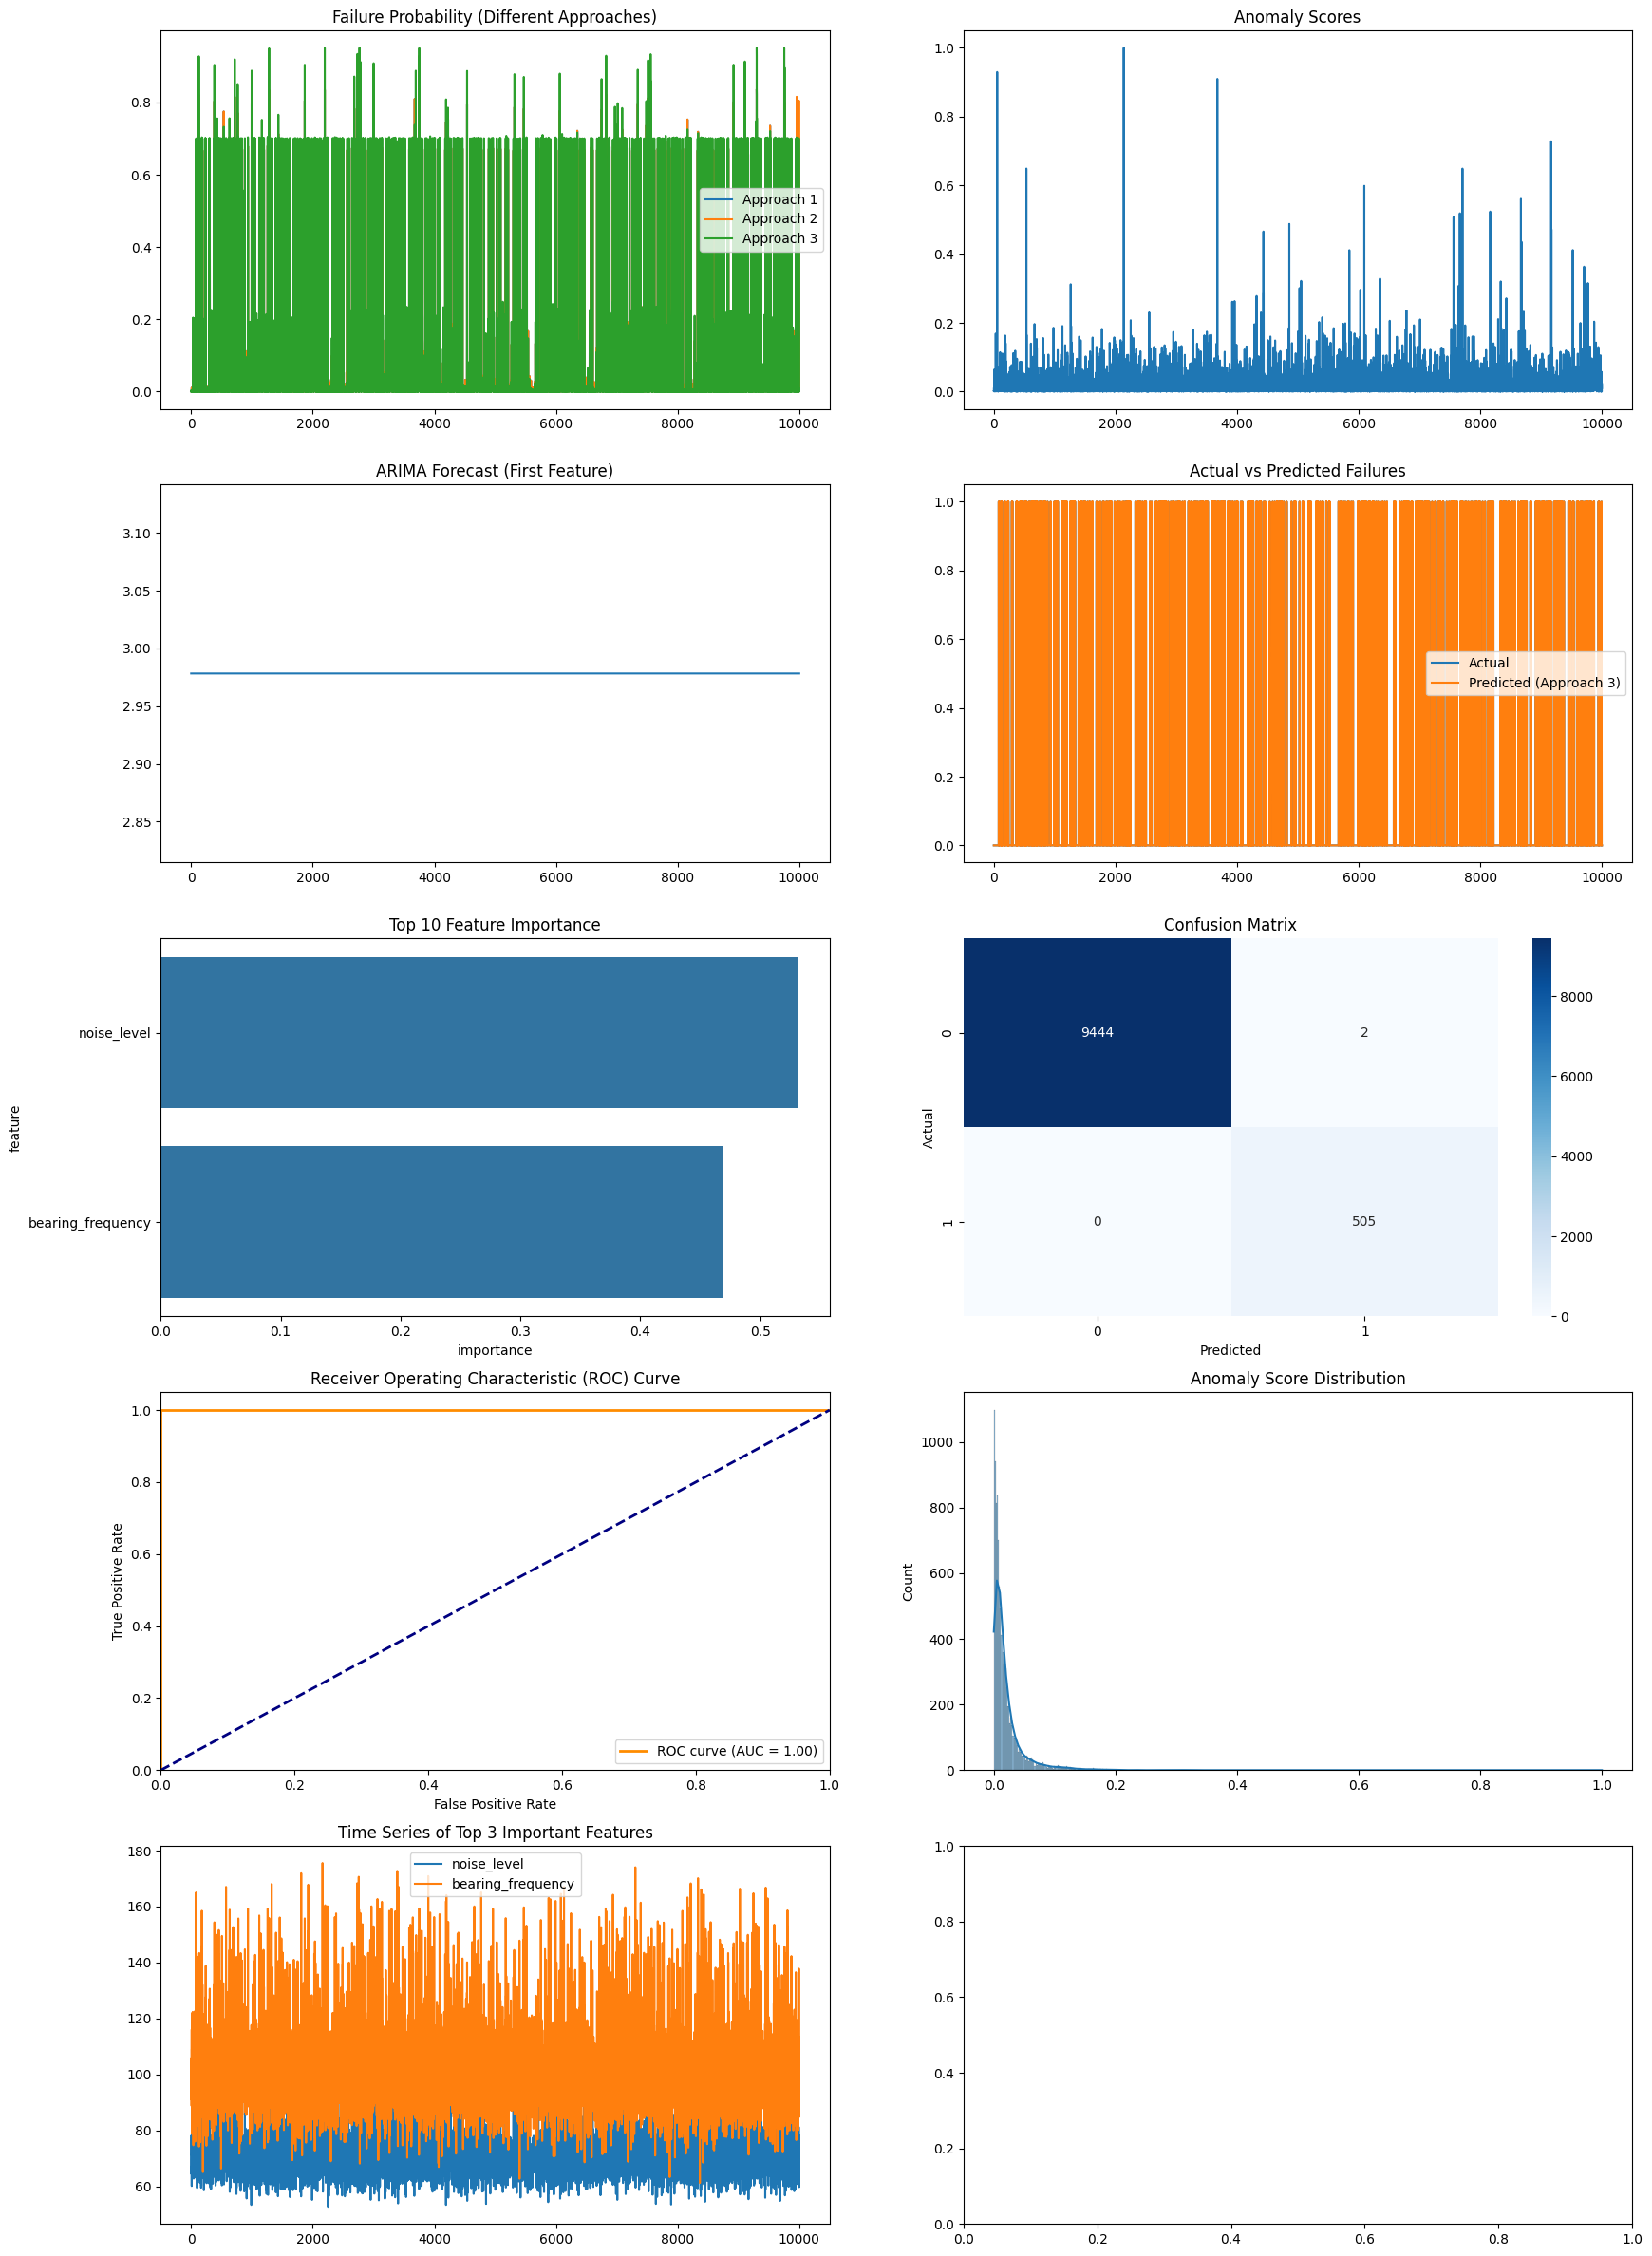

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam
from sklearn.impute import SimpleImputer
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
from sklearn.utils import resample

class EnhancedAdvancedHybridPumpMaintenanceModel:
    def __init__(self, sequence_length=50):
        self.sequence_length = sequence_length
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='mean')
        self.rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        self.svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
        self.xgb_model = XGBClassifier(random_state=42, scale_pos_weight=19)  # Adjusted for 5% failure rate
        self.lstm_model = None
        self.autoencoder = None
        self.arima_models = {}
        self.stacking_model = None
        self.feature_selector = None

    def preprocess_data(self, X, y=None, is_training=True):
        X = self.imputer.fit_transform(X) if is_training else self.imputer.transform(X)
        X = self.scaler.fit_transform(X) if is_training else self.scaler.transform(X)
        if y is not None:
            return X, y
        return X

    def create_sequences(self, X, y=None):
        X_seq = []
        y_seq = []
        for i in range(len(X) - self.sequence_length + 1):
            X_seq.append(X[i:i+self.sequence_length])
            if y is not None:
                y_seq.append(y[i+self.sequence_length-1])
        return np.array(X_seq), np.array(y_seq) if y is not None else None

    def build_lstm_model(self, input_shape):
        model = Sequential([
            Bidirectional(LSTM(64, return_sequences=True, input_shape=input_shape)),
            Dropout(0.2),
            Bidirectional(LSTM(32, return_sequences=True)),
            Dropout(0.2),
            TimeDistributed(Dense(16, activation='relu')),
            LSTM(16),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def build_autoencoder(self, input_shape):
        model = Sequential([
            Dense(32, activation="relu", input_shape=input_shape),
            Dense(16, activation="relu"),
            Dense(8, activation="relu"),
            Dense(16, activation="relu"),
            Dense(32, activation="relu"),
            Dense(input_shape[0], activation="linear")
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    def fit(self, X, y):
        X_processed, y = self.preprocess_data(X, y)

        X_resampled, y_resampled = self._resample(X_processed, y)

        # Feature selection
        self.feature_selector = SelectFromModel(XGBClassifier(random_state=42))
        X_selected = self.feature_selector.fit_transform(X_resampled, y_resampled)

        X_train, X_val, y_train, y_val = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

        # Train traditional ML models
        self.rf_model.fit(X_train, y_train)
        self.svm_model.fit(X_train, y_train)
        self.xgb_model.fit(X_train, y_train)

        # Prepare sequences for LSTM
        X_seq, y_seq = self.create_sequences(X_selected, y_resampled)
        X_seq_train, X_seq_val, y_seq_train, y_seq_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

        # Train LSTM model
        self.lstm_model = self.build_lstm_model((X_seq.shape[1], X_seq.shape[2]))
        self.lstm_model.fit(X_seq_train, y_seq_train, validation_data=(X_seq_val, y_seq_val), epochs=5, batch_size=32, verbose=1)

        # Train autoencoder
        self.autoencoder = self.build_autoencoder((X_selected.shape[1],))
        self.autoencoder.fit(X_selected, X_selected, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

        # Train ARIMA models for each feature
        for i in range(X_selected.shape[1]):
            try:
                model = ARIMA(X_selected[:, i], order=(1,1,1))
                self.arima_models[i] = model.fit()
            except:
                print(f"Unable to fit ARIMA model for feature {i}")

        # Train stacking ensemble
        base_models = [
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
            ('svm', SVC(probability=True, random_state=42, class_weight='balanced')),
            ('xgb', XGBClassifier(random_state=42, scale_pos_weight=19))
        ]
        self.stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
        self.stacking_model.fit(X_train, y_train)



    def visualize_results(self, X, y, predictions_1, predictions_2, predictions_3, anomaly_scores, arima_forecasts):
      # Set up the matplotlib figure
      plt.figure(figsize=(20, 30))

      # 1. Failure Probability (Different Approaches)
      plt.subplot(5, 2, 1)
      plt.plot(predictions_1, label='Approach 1')
      plt.plot(predictions_2, label='Approach 2')
      plt.plot(predictions_3, label='Approach 3')
      plt.title('Failure Probability (Different Approaches)')
      plt.legend()

      # 2. Anomaly Scores
      plt.subplot(5, 2, 2)
      plt.plot(anomaly_scores)
      plt.title('Anomaly Scores')

      # 3. ARIMA Forecast (First Feature)
      plt.subplot(5, 2, 3)
      plt.plot(arima_forecasts[:, 0])
      plt.title('ARIMA Forecast (First Feature)')

      # 4. Actual vs Predicted Failures
      plt.subplot(5, 2, 4)
      plt.plot(y, label='Actual')
      plt.plot((predictions_3 > 0.5).astype(int), label='Predicted (Approach 3)')
      plt.title('Actual vs Predicted Failures')
      plt.legend()

      # 5. Feature Importance
      feature_importance = self.rf_model.feature_importances_
      feature_names = X.columns[self.feature_selector.get_support()]
      importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
      importance_df = importance_df.sort_values('importance', ascending=False)

      plt.subplot(5, 2, 5)
      sns.barplot(x='importance', y='feature', data=importance_df.head(10))
      plt.title('Top 10 Feature Importance')

      # 6. Confusion Matrix
      plt.subplot(5, 2, 6)
      cm = confusion_matrix(y[self.sequence_length-1:], (predictions_3[self.sequence_length-1:] > 0.5).astype(int))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title('Confusion Matrix')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')

      # 7. ROC Curve
      plt.subplot(5, 2, 7)
      fpr, tpr, _ = roc_curve(y[self.sequence_length-1:], predictions_3[self.sequence_length-1:])
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC) Curve')
      plt.legend(loc="lower right")

      # 8. Anomaly Score Distribution
      plt.subplot(5, 2, 8)
      sns.histplot(anomaly_scores, kde=True)
      plt.title('Anomaly Score Distribution')

      # 9. Time Series of Key Features
      plt.subplot(5, 2, 9)
      for feature in importance_df['feature'].head(3):  # Plot top 3 important features
          plt.plot(X[feature], label=feature)
      plt.title('Time Series of Top 3 Important Features')
      plt.legend()

      # 10. t-SNE Visualization
      plt.subplot(5, 2, 10)
      tsne = TSNE(n_components=2, random_state=42)
      X_tsne = tsne.fit_transform(X)
      plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
      plt.title('t-SNE Visualization of Features')
      plt.colorbar(label='Failure')

      plt.tight_layout()
      plt.show()



    def _resample(self, X, y):
        # Separate majority and minority classes
        X_majority = X[y == 0]
        X_minority = X[y == 1]
        y_majority = y[y == 0]
        y_minority = y[y == 1]

        # Upsample minority class
        X_minority_upsampled, y_minority_upsampled = resample(X_minority,
                                                              y_minority,
                                                              replace=True,
                                                              n_samples=len(X_majority),
                                                              random_state=42)

        # Combine majority class with upsampled minority class
        X_resampled = np.vstack((X_majority, X_minority_upsampled))
        y_resampled = np.hstack((y_majority, y_minority_upsampled))

        return X_resampled, y_resampled

    def predict(self, X):
        X_processed = self.preprocess_data(X, is_training=False)
        X_selected = self.feature_selector.transform(X_processed)

        # Get predictions from traditional ML models
        rf_pred = self.rf_model.predict_proba(X_selected)[:, 1]
        svm_pred = self.svm_model.predict_proba(X_selected)[:, 1]
        xgb_pred = self.xgb_model.predict_proba(X_selected)[:, 1]

        # Prepare sequences for LSTM
        X_seq, _ = self.create_sequences(X_selected)
        lstm_pred = self.lstm_model.predict(X_seq).flatten()

        # Get stacking ensemble predictions
        stacking_pred = self.stacking_model.predict_proba(X_selected)[:, 1]

        # Anomaly detection with autoencoder
        reconstructed = self.autoencoder.predict(X_selected)
        mse = np.mean(np.power(X_selected - reconstructed, 2), axis=1)
        anomaly_scores = (mse - np.min(mse)) / (np.max(mse) - np.min(mse))

        # ARIMA forecasting
        arima_forecasts = np.zeros_like(X_selected)
        for i in range(X_selected.shape[1]):
            if i in self.arima_models:
                forecast = self.arima_models[i].forecast(steps=1)
                arima_forecasts[:, i] = forecast

        # Combine predictions using different approaches
        combined_pred_1 = self._combine_predictions_approach_1(rf_pred, svm_pred, xgb_pred, lstm_pred, stacking_pred, anomaly_scores)
        combined_pred_2 = self._combine_predictions_approach_2(rf_pred, svm_pred, xgb_pred, lstm_pred, stacking_pred, anomaly_scores)
        combined_pred_3 = self._combine_predictions_approach_3(rf_pred, svm_pred, xgb_pred, lstm_pred, stacking_pred, anomaly_scores)

        return combined_pred_1, combined_pred_2, combined_pred_3, anomaly_scores, arima_forecasts

    def _combine_predictions_approach_1(self, rf_pred, svm_pred, xgb_pred, lstm_pred, stacking_pred, anomaly_scores):
        # Approach 1: Use all predictions, padding LSTM predictions
        n = len(rf_pred)
        m = len(lstm_pred)
        pad_length = n - m
        lstm_pred_padded = np.pad(lstm_pred, (0, pad_length), mode='edge')
        return (rf_pred + svm_pred + xgb_pred + lstm_pred_padded + stacking_pred + anomaly_scores) / 6

    def _combine_predictions_approach_2(self, rf_pred, svm_pred, xgb_pred, lstm_pred, stacking_pred, anomaly_scores):
        # Approach 2: Use LSTM predictions only for available timesteps
        n = len(rf_pred)
        m = len(lstm_pred)
        combined_pred = np.zeros(n)
        combined_pred[:m] = (rf_pred[:m] + svm_pred[:m] + xgb_pred[:m] + lstm_pred + stacking_pred[:m] + anomaly_scores[:m]) / 6
        combined_pred[m:] = (rf_pred[m:] + svm_pred[m:] + xgb_pred[m:] + stacking_pred[m:] + anomaly_scores[m:]) / 5
        return combined_pred

    def _combine_predictions_approach_3(self, rf_pred, svm_pred, xgb_pred, lstm_pred, stacking_pred, anomaly_scores):
        # Approach 3: Weighted average based on model performance
        n = len(rf_pred)
        m = len(lstm_pred)
        pad_length = n - m
        lstm_pred_padded = np.pad(lstm_pred, (0, pad_length), mode='edge')
        weights = np.array([0.2, 0.15, 0.2, 0.25, 0.15, 0.05])  # Adjust these weights based on model performance
        return np.average(np.vstack((rf_pred, svm_pred, xgb_pred, lstm_pred_padded, stacking_pred, anomaly_scores)), axis=0, weights=weights)

if __name__ == "__main__":
    # Load the enhanced dummy data
    data = pd.read_excel("enhanced_pump_maintenance_data_with_units.xlsx")

    # Split features and target
    X = data.drop('failure', axis=1)
    y = data['failure']

    # Initialize and train the model
    model = EnhancedAdvancedHybridPumpMaintenanceModel()
    model.fit(X, y)

    # Make predictions
    predictions_1, predictions_2, predictions_3, anomaly_scores, arima_forecasts = model.predict(X)

    # Visualize results
    model.visualize_results(X, y, predictions_1, predictions_2, predictions_3, anomaly_scores, arima_forecasts)

    # Print classification reports
    threshold = 0.5
    print("Approach 1 Classification Report:")
    print(classification_report(y[model.sequence_length-1:], (predictions_1[model.sequence_length-1:] > threshold).astype(int)))

    print("\nApproach 2 Classification Report:")
    print(classification_report(y[model.sequence_length-1:], (predictions_2[model.sequence_length-1:] > threshold).astype(int)))

    print("\nApproach 3 Classification Report:")
    print(classification_report(y[model.sequence_length-1:], (predictions_3[model.sequence_length-1:] > threshold).astype(int)))

    # Plot results
    plt.figure(figsize=(20, 15))
    plt.subplot(2, 2, 1)
    plt.plot(predictions_1, label='Approach 1')
    plt.plot(predictions_2, label='Approach 2')
    plt.plot(predictions_3, label='Approach 3')
    plt.title('Failure Probability (Different Approaches)')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(anomaly_scores)
    plt.title('Anomaly Scores')

    plt.subplot(2, 2, 3)
    plt.plot(arima_forecasts[:, 0])  # Plotting forecast for the first feature
    plt.title('ARIMA Forecast (First Feature)')

    plt.subplot(2, 2, 4)
    plt.plot(y, label='Actual')
    plt.plot(binary_predictions_3, label='Predicted (Approach 3)')
    plt.title('Actual vs Predicted Failures')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Feature importance analysis
    feature_importance = model.rf_model.feature_importances_
    feature_names = X.columns[model.feature_selector.get_support()]
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
    importance_df = importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(importance_df['feature'], importance_df['importance'])
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy import stats
import random
from datetime import datetime, timedelta

class PumpMaintenanceDataGenerator:
    def __init__(self, n_samples=10000):
        self.n_samples = n_samples
        self.failure_probability_base = 0.05
        self.normal_operating_ranges = {
            'flow_rate': (90, 110, 5),  # (min, max, std)
            'pressure': (45, 55, 2),
            'head': (25, 35, 1.5),
            'power': (900, 1100, 50),
            'speed': (1750, 1850, 25),
            'npsh': (9, 11, 0.5),
            'vibration_amplitude': (0.3, 0.7, 0.1),
            'vibration_frequency': (55, 65, 2),
            'motor_temperature': (65, 75, 3),
            'bearing_temperature': (55, 65, 2),
            'inlet_pressure': (27, 33, 1.5),
            'outlet_pressure': (75, 85, 2.5),
            'water_velocity': (4.5, 5.5, 0.2),
            'current_draw': (45, 55, 2),
            'voltage': (215, 225, 3),
            'torque': (90, 110, 5),
            'ambient_temperature': (20, 30, 2),
            'humidity': (30, 70, 10),
            'noise_level': (65, 75, 2),
            'bearing_frequency': (90, 110, 5),
            'bearing_amplitude': (0.08, 0.12, 0.01)
        }

    def _generate_seasonal_pattern(self):
        # Generate seasonal pattern for temperature and load
        t = np.linspace(0, 2*np.pi, self.n_samples)
        seasonal = np.sin(t) + 0.5 * np.sin(2*t) + 0.2 * np.sin(3*t)
        return (seasonal - seasonal.min()) / (seasonal.max() - seasonal.min())

    def _generate_trend(self):
        # Generate linear trend with some random noise
        trend = np.linspace(0, 1, self.n_samples)
        noise = np.random.normal(0, 0.1, self.n_samples)
        return trend + noise

    def _add_degradation_pattern(self, base_signal, component_age):
        # Add wear and tear effects
        degradation = 1 + 0.5 * (component_age ** 1.5)
        return base_signal * degradation

    def _generate_maintenance_events(self):
        # Generate random maintenance events
        maintenance_events = np.zeros(self.n_samples)
        last_maintenance = 0
        maintenance_interval = random.randint(1000, 1500)

        for i in range(self.n_samples):
            if i - last_maintenance >= maintenance_interval:
                maintenance_events[i] = 1
                last_maintenance = i
                maintenance_interval = random.randint(1000, 1500)

        return maintenance_events

    def _add_random_anomalies(self, signal, anomaly_probability=0.02):
        # Add sudden spikes and drops
        anomaly_mask = np.random.random(self.n_samples) < anomaly_probability
        anomaly_factors = np.random.uniform(1.5, 2.5, size=self.n_samples)
        signal[anomaly_mask] *= anomaly_factors[anomaly_mask]
        return signal

    def _butter_lowpass_filter(self, data, cutoff=0.1, fs=1.0, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return lfilter(b, a, data)

    def generate_data(self):
        # Initialize empty dataframe
        data = pd.DataFrame()

        # Generate time-based patterns
        seasonal_pattern = self._generate_seasonal_pattern()
        trend = self._generate_trend()
        maintenance_events = self._generate_maintenance_events()

        # Generate timestamps
        start_date = datetime(2023, 1, 1)
        timestamps = [start_date + timedelta(hours=i) for i in range(self.n_samples)]
        data['timestamp'] = timestamps

        # Generate features with correlations and patterns
        for feature, (min_val, max_val, std) in self.normal_operating_ranges.items():
            # Base signal
            base_signal = np.random.normal((min_val + max_val)/2, std, self.n_samples)

            # Add patterns based on feature type
            if feature in ['motor_temperature', 'bearing_temperature', 'ambient_temperature']:
                base_signal += 10 * seasonal_pattern

            if feature in ['vibration_amplitude', 'bearing_amplitude', 'noise_level']:
                base_signal = self._add_degradation_pattern(base_signal, trend)

            # Add noise and anomalies
            base_signal = self._add_random_anomalies(base_signal)

            # Apply maintenance effects
            maintenance_mask = maintenance_events == 1
            base_signal[maintenance_mask] *= 0.8  # Improvement after maintenance

            # Apply lowpass filter to smooth the signal
            base_signal = self._butter_lowpass_filter(base_signal)

            # Ensure values stay within reasonable bounds
            base_signal = np.clip(base_signal, min_val*0.5, max_val*1.5)

            data[feature] = base_signal

        # Generate failures based on multiple conditions
        failure_probability = np.zeros(self.n_samples)

        # Increase failure probability based on various conditions
        failure_probability += (data['vibration_amplitude'] > self.normal_operating_ranges['vibration_amplitude'][1]) * 0.2
        failure_probability += (data['bearing_temperature'] > self.normal_operating_ranges['bearing_temperature'][1]) * 0.15
        failure_probability += (data['noise_level'] > self.normal_operating_ranges['noise_level'][1]) * 0.1
        failure_probability += trend * 0.1  # Increased failure probability over time

        # Add random component to failure probability
        failure_probability += np.random.random(self.n_samples) * 0.1

        # Generate actual failures
        data['failure'] = (failure_probability > 0.7).astype(int)

        # Add start_stop_cycles
        data['start_stop_cycles'] = np.cumsum(np.random.binomial(1, 0.05, self.n_samples))

        # Add runtime_hours
        data['runtime_hours'] = np.cumsum(np.where(data['start_stop_cycles'] > 0,
                                                  np.random.uniform(0, 12, self.n_samples),
                                                  np.random.uniform(20, 24, self.n_samples)))

        return data

# Generate more realistic data
generator = PumpMaintenanceDataGenerator(n_samples=10000)
data = generator.generate_data()

# Save to Excel file
data.to_excel("enhanced_pump_maintenance_data_with_units.xlsx", index=False)

# Print summary statistics
print("\nData statistics:")
print(data.describe())

print("\nFailure rate:")
print(data['failure'].mean())

# Correlation analysis
correlation_matrix = data.corr()
print("\nHighest correlations with failure:")
failure_correlations = correlation_matrix['failure'].sort_values(ascending=False)
print(failure_correlations.head(10))


Data statistics:
                 timestamp     flow_rate      pressure          head  \
count                10000  10000.000000  10000.000000  10000.000000   
mean   2023-07-28 07:30:00    102.049877     51.003344     30.583385   
min    2023-01-01 00:00:00     45.000000     22.500000     12.500000   
25%    2023-04-15 03:45:00     98.536234     49.348975     29.536631   
50%    2023-07-28 07:30:00    100.429604     50.144050     30.111622   
75%    2023-11-09 11:15:00    102.546717     51.073182     30.801402   
max    2024-02-21 15:00:00    155.642580     81.786361     48.872816   
std                    NaN      7.336091      3.616109      2.108682   

              power         speed          npsh  vibration_amplitude  \
count  10000.000000  10000.000000  10000.000000                  0.0   
mean    1018.265359   1834.068613     10.215547                  NaN   
min      450.000000    875.000000      4.500000                  NaN   
25%      984.439870   1791.587036      9.8545

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=32):
        super().__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        self.fc_mu = nn.Linear(64, latent_dim)
        self.fc_var = nn.Linear(64, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        log_var = self.fc_var(result)
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        return self.decoder(z), mu, log_var

class TransformerBlock(nn.Module):
    def __init__(self, input_dim, num_heads=8, dropout=0.1):
        super().__init__()
        self.attention = nn.MultiheadAttention(input_dim, num_heads, dropout=dropout)
        self.norm1 = nn.LayerNorm(input_dim)
        self.norm2 = nn.LayerNorm(input_dim)
        self.ff = nn.Sequential(
            nn.Linear(input_dim, input_dim * 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(input_dim * 4, input_dim)
        )

    def forward(self, x):
        attended, _ = self.attention(x, x, x)
        x = self.norm1(x + attended)
        x = self.norm2(x + self.ff(x))
        return x

class AdvancedPumpMaintenanceModel(pl.LightningModule):
    def __init__(self, input_dim, sequence_length=50, learning_rate=1e-4):
        super().__init__()
        self.save_hyperparameters()
        self.input_dim = input_dim
        self.sequence_length = sequence_length
        self.learning_rate = learning_rate

        # VAE for feature extraction and anomaly detection
        self.vae = VariationalAutoencoder(input_dim)

        # Transformer for temporal patterns
        self.transformer = nn.Sequential(
            TransformerBlock(input_dim),
            TransformerBlock(input_dim)
        )

        # Vibration analysis branch
        self.vibration_nn = nn.Sequential(
            nn.Linear(6, 32),  # Vibration-related features
            nn.ReLU(),
            nn.Linear(32, 16)
        )

        # Temperature analysis branch
        self.temperature_nn = nn.Sequential(
            nn.Linear(4, 32),  # Temperature-related features
            nn.ReLU(),
            nn.Linear(32, 16)
        )

        # Main prediction network
        self.prediction_net = nn.Sequential(
            nn.Linear(input_dim + 32, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

        # Quantization (optional, consider using it strategically)
        self.quantized = torch.quantization.quantize_dynamic(
            self.prediction_net,
            {nn.Linear},
            dtype=torch.qint8
        )

    def forward(self, x, vibration_features, temperature_features):
        # VAE processing
        vae_output, mu, log_var = self.vae(x)

        # Transformer processing for temporal patterns
        transformer_output = self.transformer(x.unsqueeze(0)).squeeze(0)

        # Specialized feature processing
        vibration_output = self.vibration_nn(vibration_features)
        temperature_output = self.temperature_nn(temperature_features)

        # Combine all features
        combined = torch.cat([
            transformer_output,
            vibration_output,
            temperature_output
        ], dim=1)

        # Final prediction
        return self.quantized(combined)

    def training_step(self, batch, batch_idx):
        x, vibration, temperature, y = batch
        y_hat = self(x, vibration, temperature)

        # Reconstruction loss from VAE
        vae_output, mu, log_var = self.vae(x)
        recon_loss = F.mse_loss(vae_output, x)
        kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

        # Binary cross-entropy loss for prediction
        pred_loss = F.binary_cross_entropy(y_hat, y)

        # Combined loss
        loss = pred_loss + 0.1 * (recon_loss + kl_loss)

        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=5
        )
        return {
            'optimizer': optimizer,
            'lr_scheduler': scheduler,
            'monitor': 'val_loss'
        }

class PumpDataset(Dataset):
    def __init__(self, data, sequence_length=50):
        self.data = data
        self.sequence_length = sequence_length

        # Define feature groups
        self.vibration_features = [
            'vibration_amplitude', 'vibration_frequency',
            'bearing_frequency', 'bearing_amplitude',
            'noise_level', 'torque'
        ]

        self.temperature_features = [
            'motor_temperature', 'bearing_temperature',
            'ambient_temperature', 'power'
        ]

        # Preprocessing
        self.scaler = StandardScaler()
        self.processed_data = self.preprocess_data()

    def preprocess_data(self):
        # Scale the data
        scaled_data = self.scaler.fit_transform(self.data.drop(['failure', 'timestamp'], axis=1))
        return scaled_data

    def __len__(self):
        return len(self.processed_data) - self.sequence_length

    def __getitem__(self, idx):
        # Get sequence
        sequence = self.processed_data[idx:idx + self.sequence_length]

        # Get vibration and temperature features
        vibration_idx = [self.data.columns.get_loc(col) for col in self.vibration_features]
        temperature_idx = [self.data.columns.get_loc(col) for col in self.temperature_features]

        vibration_sequence = sequence[:, vibration_idx]
        temperature_sequence = sequence[:, temperature_idx]

        # Get target
        target = self.data.iloc[idx + self.sequence_length]['failure']

        return (
            torch.FloatTensor(sequence),
            torch.FloatTensor(vibration_sequence),
            torch.FloatTensor(temperature_sequence),
            torch.FloatTensor([target])
        )

def train_model(data_path="enhanced_pump_maintenance_data_with_units.xlsx"):

SyntaxError: incomplete input (<ipython-input-18-77e51b71aa00>, line 225)